In [1]:
import QIBA
from processing_functions import AnalysisPar
from processing_functions import QIBAPlotPar

In [2]:
# Setup Processing Parameters

# Put the filepath of where your data is saved here!
save_dir = "/fastrs/ultrasound/TIMuscle/Phantoms/20250411_Test_QIBA/2.3_mps_elastic"

# Parameters for Analyzing ARFI Data
    
kasai_kernel_size_WL = 1.5
    
axial_processing_depth_mm = "push_focus"
Depth_of_Field_to_average_mm = 2 # depth of field to average (mm)
        
min_lat_mm         = 4           # min lateral position (mm) to start analysis
max_lat_mm         = 15          # max lateral position (mm) to end analysis
max_time_ms        = 40          # maximum time (ms) to use in analysis
min_time_ms        = -15       # minimum time (ms) to zero-pad before push
rolloff_time_ms    = 15          # time (ms) for rolloff at early and late times
n_steps_to_remove   = 2           # number of reverb steps to remove
LPF_cutoff_kHz     = 1           # low-pass filter cutoff frequency (kHz)
desired_PRF_kHz    = 20          # desired PRF (kHz) after upsampling in time 
min_phase_vel_freq_Hz = 20   # frequencies (Hz) for phase velocity measurements
max_phase_vel_freq_Hz = 800
phase_vel_analysis_step_Hz = 10

# Parameters for plotting and saving outputs

phantomID        = 'Fully Elastic CIRS Phantom';  # phantom ID string
maxPlotSpeed     = 4.5;         # maximum speed for gSWS and phVel plots
maxplotfreq      = 820;         # max frequency (Hz) for plot
fracErrorBar     = 0.3;         # fixed fraction for error bars
CIfactor         = 1.96;        # confidence interval for error bars
fmax             = 800;         # maximum frequency (Hz) to plot
rmin             = 0.004;       # minimum lateral position (m) for low freq cutoff
krThreshold      = 1.5;         # kr threshold for low freq cutoff
maxSpeed         = 8;           # max speed for "good" result
thFactor         = 2;           # Vel accept range = +/- thfactor * std
maxValidGSWS     = 5;           # maximum group speed where results are valid
minValidGSWS     = 0.5;         # minimum group speed where results are valid

analysis_params = AnalysisPar.AnalysisPar(save_dir, kasai_kernel_size_WL, axial_processing_depth_mm,
                                          Depth_of_Field_to_average_mm, min_lat_mm,
                                          max_lat_mm, min_time_ms, max_time_ms,
                                          rolloff_time_ms, n_steps_to_remove,
                                          LPF_cutoff_kHz, desired_PRF_kHz,
                                          min_phase_vel_freq_Hz, max_phase_vel_freq_Hz,
                                          phase_vel_analysis_step_Hz)

plot_params = QIBAPlotPar.QIBAPlotPar(phantomID, maxPlotSpeed, maxplotfreq, fracErrorBar, CIfactor, 
                                        fmax, rmin, krThreshold, maxSpeed, thFactor, maxValidGSWS, 
                                        minValidGSWS)


Total Acquisitions Found: 10
Processing Acquisition...:


  0%|          | 0/10 [00:00<?, ?it/s]

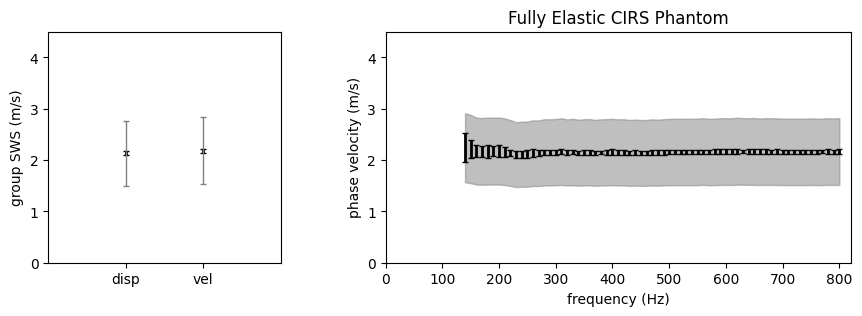

In [3]:
output = QIBA.Analyze_All_Acquisitions(save_dir, analysis_params, plot_params)

After processing all of the acquisitions, information about each acquisition will be stored in the output variable, each marked with their file timestamp:

In [4]:
output.include_dict

{'20250411153244': [True, True],
 '20250411153303': [True, True],
 '20250411153301': [True, True],
 '20250411153240': [True, True],
 '20250411153247': [True, True],
 '20250411153250': [True, True],
 '20250411153253': [True, True],
 '20250411153306': [True, True],
 '20250411153258': [True, True],
 '20250411153256': [True, True]}

The `[True, True]` indicates that shear waves propagating in both the leftward and rightward directions are included in the final reported results.

To exclude a single side of an acquisition, mark it as False in the include_dict dictionary. To exclude an entire acquisition, mark both sides as False:

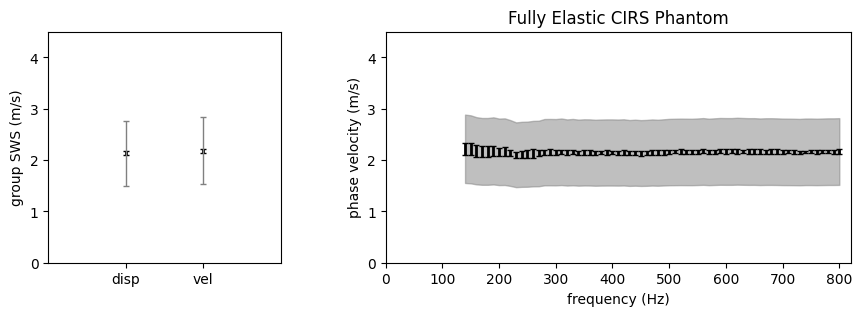

In [5]:
acqs = output.acq_timestamps

# Mark acq 3 as entirely excluded:
output.include_dict[acqs[2]] = [False, False]

# Mark the leftward propagating wave in acq 7 as excluded:
output.include_dict[acqs[6]] = [False, True]

# Re-process SWSs and re-generate final outputs:

QIBA.filter_SWSs_and_display_final_outputs(output, plot_params)

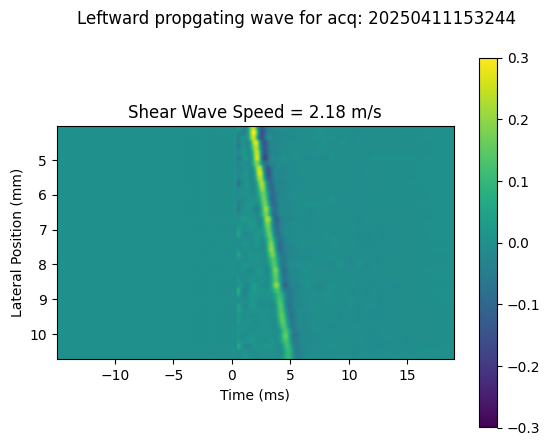

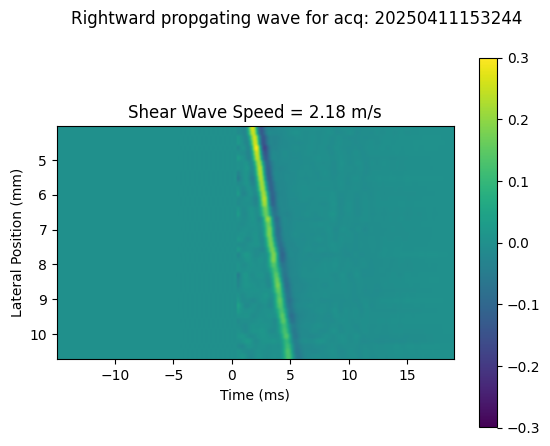

In [6]:
output.show_spacetime_plot_for_acq(acqs[0])

Can also show the displacement data planes:

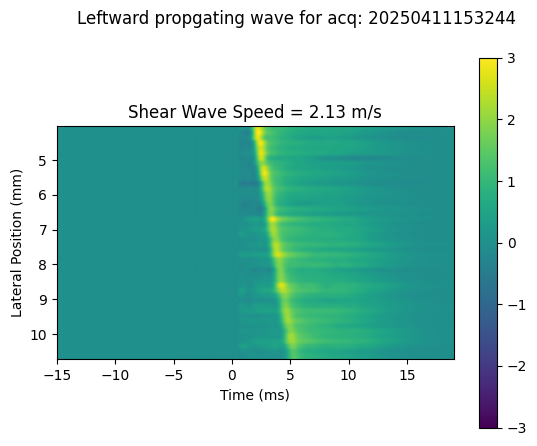

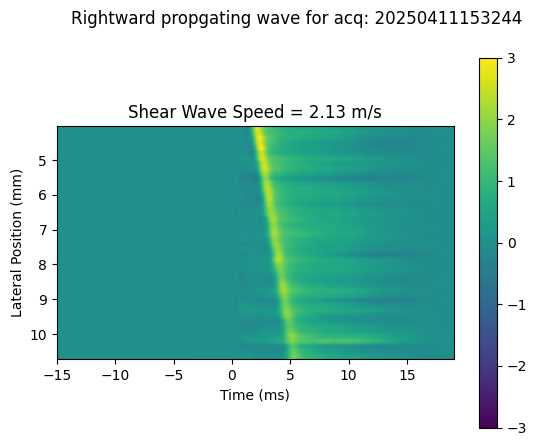

In [7]:
output.show_spacetime_plot_for_acq(acqs[0], plane_type='displacement')

There is an additional helper function that can be used to generate gifs of the displacement data, which can be seen below:

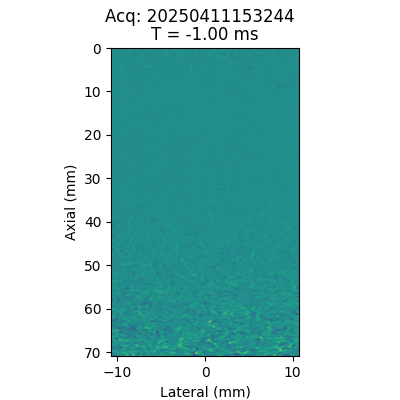

In [8]:
gif_obj = output.generate_displacement_gif_for_acq(acqs[0])

gif_obj